 ## Modeling Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import pickle

sns.set()

## 1. Relevant Functions

In [2]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.figure(figsize = (8,6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [3]:
def plot_impfeatures(models, model_label, ncol=None):
    if ncol is None:
        ncol = 2
    nrow = int(np.ceil(len(models) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, model in enumerate(models):
        ax = axes.flatten()[i]
        print(model)
        importances = model.feature_importances_
        indices = np.argsort(importances)
        features = X_train.columns
        
        ax.barh(range(len(indices)), importances[indices], color='b', align='center')
        ax.set(title=model_label[i])
        ax.set(xlabel='Relative Importance')
        ax.set_yticks(range(len(indices)), [features[i] for i in indices])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [4]:
def auc_score(model, y_test, X_test):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc_score = metrics.auc(fpr, tpr)
    return auc_score

In [5]:
def shap_values(model):
    explainer = shap.Explainer(model.predict,X_train[0:100])
    shap_values = explainer(X_test)
    return shap_values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
final_df = pd.read_csv('../clean_data/final_df.csv')
final_df.head()

,step,amount,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,281,109339.40,0,0,1,0,0,0
1,381,32426.51,0,1,0,0,0,0
2,20,55810.86,0,1,0,0,0,0
3,331,50514.72,0,0,1,0,0,0
4,182,16539.44,0,0,0,0,1,0


In [8]:
y = final_df['isFraud']
X = final_df.drop(columns = 'isFraud')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## 2. Best Models 

In [10]:
# Model filepath
rf_model = '../models/RandomForest.pkl'
xg_model = '../models/XGBoost.pkl'

In [11]:
# Load Models
rf = pickle.load(open(rf_model, 'rb'))
xg = pickle.load(open(xg_model, 'rb'))

In [21]:
# Respective AUC Score
rf_result = auc_score(rf, y_test, X_test)
xg_result = auc_score(xg, y_test, X_test)
print(rf_result, xg_result)

0.95994901139995 0.9662281176987532


## 3. Important Features 

In [12]:
models = [rf, xg]
model_names = ['Random Forest', 'XGBoost']

RandomForestRegressor(n_estimators=1000)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


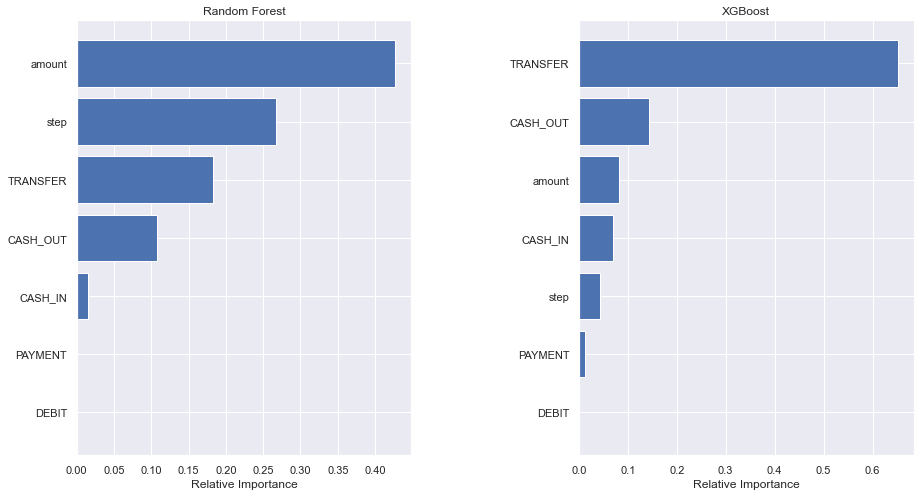

In [13]:
plot_impfeatures(models, model_names)

## 4. SHAP Analysis

In [14]:
rf_shap_values = shap_values(rf)

Exact explainer: 5422it [33:48,  2.66it/s]                                                                                                  


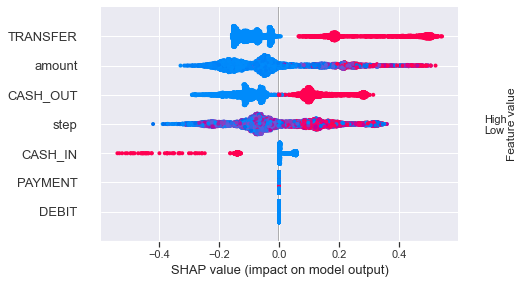

In [15]:
shap.plots.beeswarm(rf_shap_values)

In [16]:
xg_shap_values = shap_values(xg)

Exact explainer: 5422it [00:33, 111.76it/s]                                                                                                 


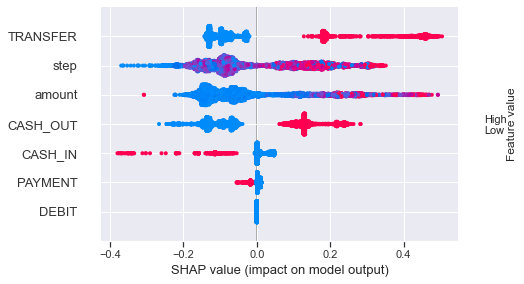

In [17]:
shap.plots.beeswarm(xg_shap_values)